In [274]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binary-prediction-of-mushroom/sample_submission.csv
/kaggle/input/binary-prediction-of-mushroom/train.csv
/kaggle/input/binary-prediction-of-mushroom/test.csv


In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [276]:
ds=pd.read_csv("/kaggle/input/binary-prediction-of-mushroom/train.csv")

In [277]:
ds.head(5) 


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [278]:
ds.tail(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u
3116944,3116944,p,3.20,x,s,g,f,d,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u


In [279]:
ds.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [280]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [281]:
ds.shape

(3116945, 22)

In [282]:
ds.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [283]:
ds['class'].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

In [284]:
ds['cap-shape'].value_counts()

cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [285]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3116945.0,1.558472e+06,899784.661737,0.00,779236.00,1558472.00,2337708.00,3116944.00
cap-diameter,3116941.0,6.309848e+00,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333e+00,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,1.115379e+01,8.095477,0.00,4.97,9.65,15.63,102.90


In [286]:
ds_for_eda=ds.sample(2000)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


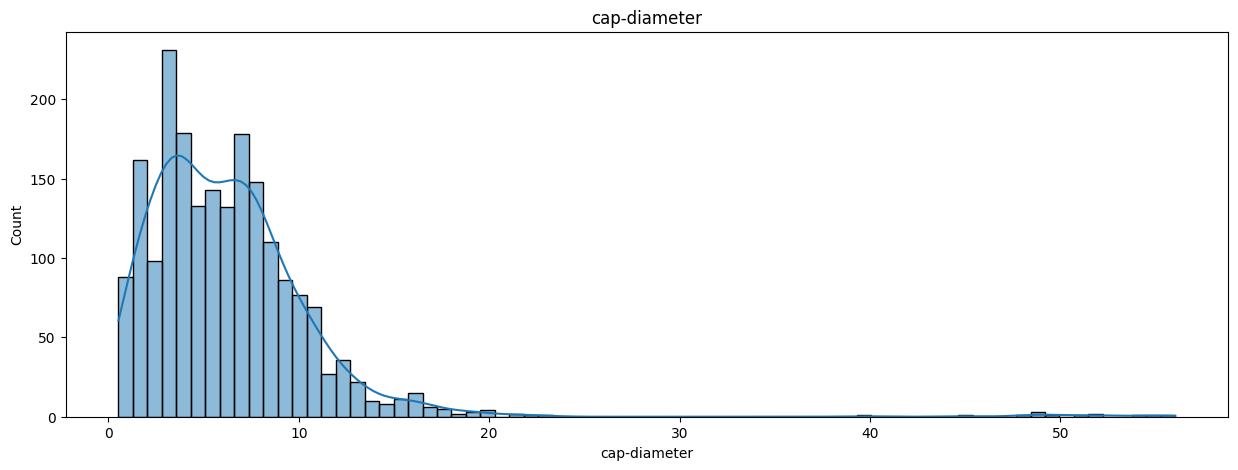

In [287]:
plt.figure(figsize=(15,5))
sns.histplot(ds_for_eda['cap-diameter'],kde=True)
plt.title("cap-diameter")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


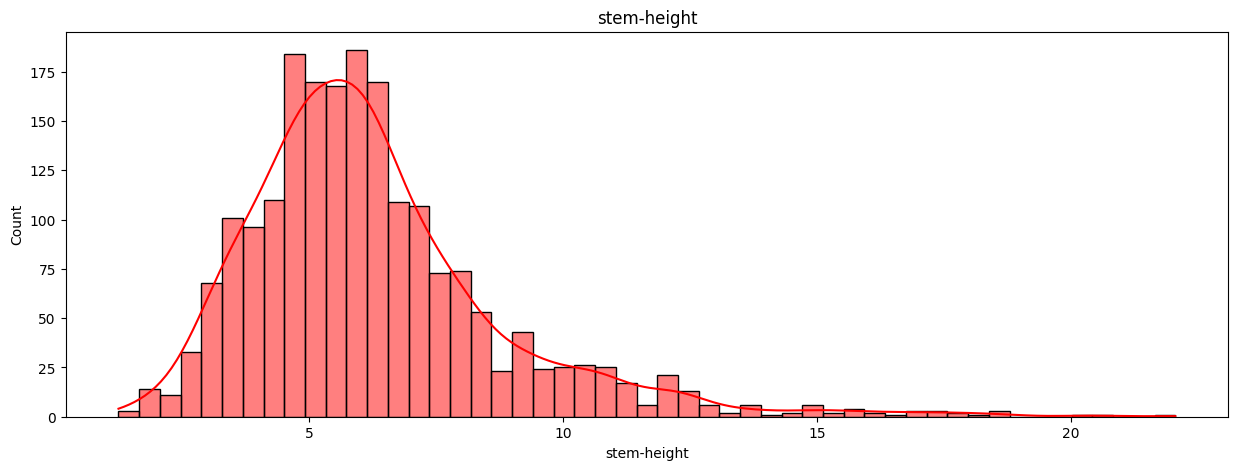

In [288]:
plt.figure(figsize=(15,5))
sns.histplot(ds_for_eda['stem-height'],kde=True,color='r')
plt.title("stem-height")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


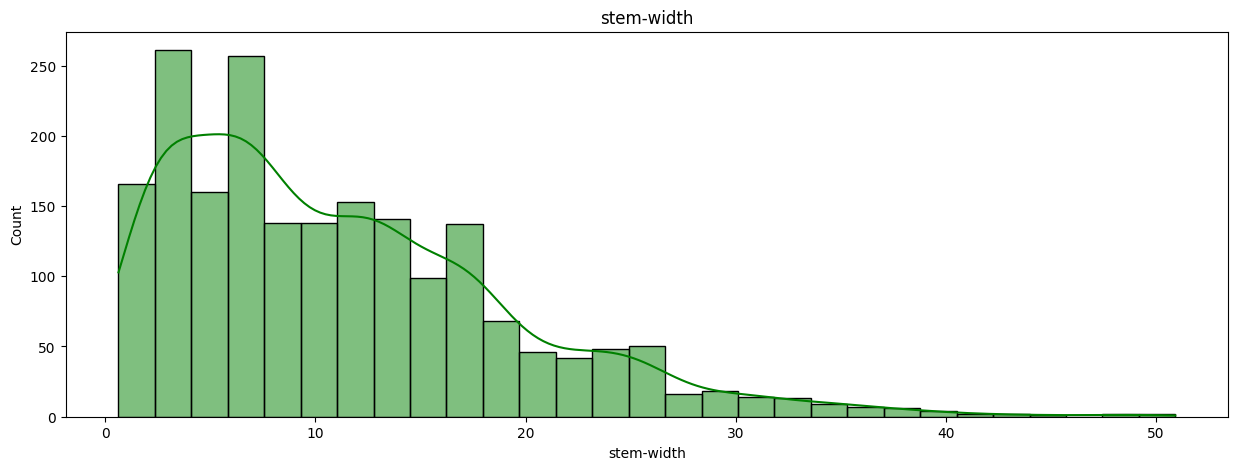

In [289]:
plt.figure(figsize=(15,5))
sns.histplot(ds_for_eda['stem-width'],kde=True,color='g')
plt.title("stem-width")
plt.show()

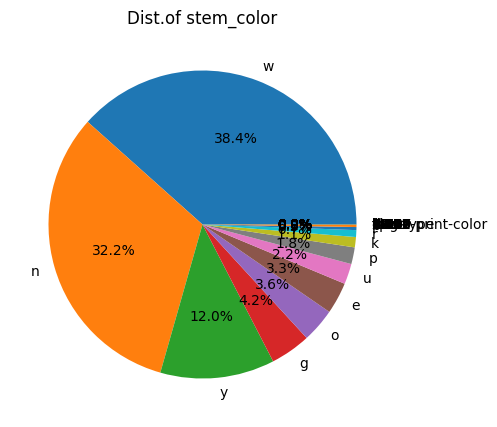

In [290]:
stem_color = ds['stem-color'].value_counts()
plt.figure(figsize=(12,5))
plt.pie(stem_color,labels=stem_color.index,autopct='%1.1f%%')
plt.title("Dist.of stem_color")
plt.show()

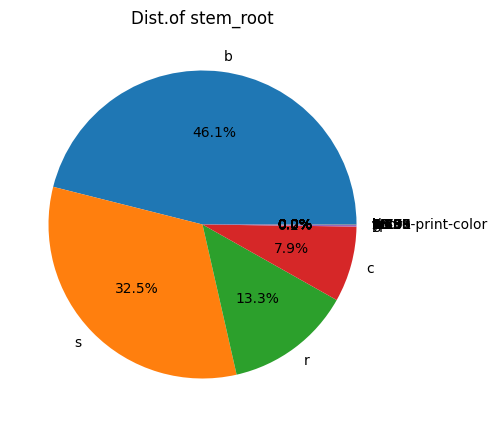

In [291]:
stem_color = ds['stem-root'].value_counts()
plt.figure(figsize=(12,5))
plt.pie(stem_color,labels=stem_color.index,autopct='%1.1f%%')
plt.title("Dist.of stem_root")
plt.show()

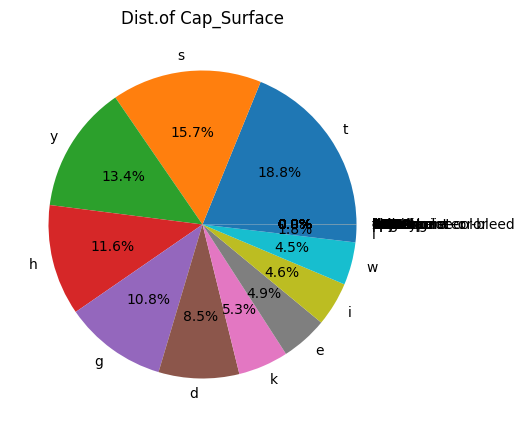

In [292]:
stem_color = ds['cap-surface'].value_counts()
plt.figure(figsize=(12,5))
plt.pie(stem_color,labels=stem_color.index,autopct='%1.1f%%')
plt.title("Dist.of Cap_Surface")
plt.show()

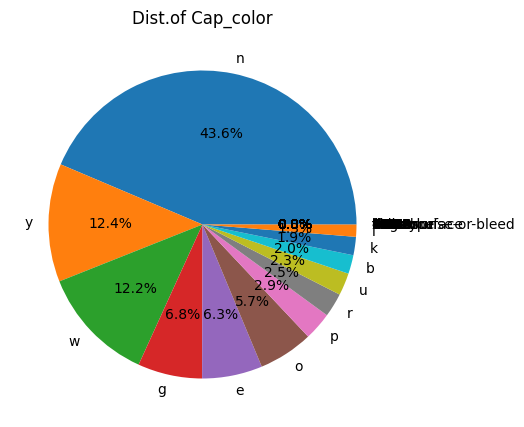

In [293]:
stem_color = ds['cap-color'].value_counts()
plt.figure(figsize=(12,5))
plt.pie(stem_color,labels=stem_color.index,autopct='%1.1f%%')
plt.title("Dist.of Cap_color")
plt.show()

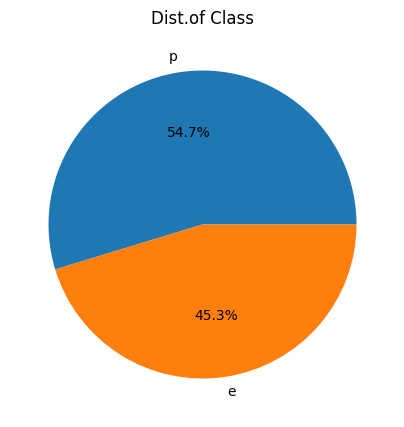

In [294]:
stem_color = ds['class'].value_counts()
plt.figure(figsize=(12,5))
plt.pie(stem_color,labels=stem_color.index,autopct='%1.1f%%')
plt.title("Dist.of Class")
plt.show()

In [295]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [296]:
missing_values_intrain = ds.isnull().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_values_intrain[missing_values_intrain > 18])

Columns in df_train with more than 10% missing values:
cap-surface          21.528227
gill-spacing         40.373988
stem-root            88.452732
stem-surface         63.551362
veil-type            94.884350
veil-color           87.936970
spore-print-color    91.425482
dtype: float64


In [297]:
cols_drop = missing_values_intrain[missing_values_intrain > 95].index 
ds = ds.drop(columns=cols_drop)


In [298]:
cols_train = ds.select_dtypes(include=['object']).columns 
cols_train = cols_train [cols_train != 'class']

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ds[cols_train] = ordinal_encoder.fit_transform(ds[cols_train].astype(str))


In [299]:
ds=ds.drop(columns=['id'])

In [300]:
ds['class'] = le.fit_transform(ds['class'])


In [301]:
x = ds.drop(columns=['class'])
y = ds['class']

In [302]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [303]:
from sklearn.metrics import matthews_corrcoef

def mcc_metric(y_true, y_pred):
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    mcc = matthews_corrcoef(y_true, y_pred)  # Calculate MCC
    return 'mcc', mcc  # Return the metric name and the value


In [304]:
 from xgboost import XGBClassifier

 model = XGBClassifier(
   alpha=0.1,
   subsample=0.8,
   colsample_bytree=0.55,
   objective='binary:logistic',
   max_depth=14,
   min_child_weight=7,
   gamma=1e-6,
   random_state=42,
   n_estimators=100
 )

 XGB = model.fit(
   x_train,
   y_train,
   eval_set=[(x_test, y_test)],
   eval_metric='logloss'  # Use a built-in metric like logloss
 )


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.47564
[1]	validation_0-logloss:0.33608
[2]	validation_0-logloss:0.25599
[3]	validation_0-logloss:0.20924
[4]	validation_0-logloss:0.16142
[5]	validation_0-logloss:0.12985
[6]	validation_0-logloss:0.10744
[7]	validation_0-logloss:0.09128
[8]	validation_0-logloss:0.07691
[9]	validation_0-logloss:0.07035
[10]	validation_0-logloss:0.06305
[11]	validation_0-logloss:0.05850
[12]	validation_0-logloss:0.05395
[13]	validation_0-logloss:0.05069
[14]	validation_0-logloss:0.04715
[15]	validation_0-logloss:0.04528
[16]	validation_0-logloss:0.04370
[17]	validation_0-logloss:0.04183
[18]	validation_0-logloss:0.04139
[19]	validation_0-logloss:0.04063
[20]	validation_0-logloss:0.03999
[21]	validation_0-logloss:0.03965
[22]	validation_0-logloss:0.03931
[23]	validation_0-logloss:0.03882
[24]	validation_0-logloss:0.03861
[25]	validation_0-logloss:0.03833
[26]	validation_0-logloss:0.03819
[27]	validation_0-logloss:0.03795
[28]	validation_0-logloss:0.03788
[29]	validation_0-loglos

In [305]:
from sklearn.metrics import matthews_corrcoef

# After model prediction
y_pred = model.predict(x_test)
score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)


MCC: 0.9837650948902628


In [306]:
df=pd.read_csv("/kaggle/input/binary-prediction-of-mushroom/test.csv")
df

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [311]:
df.isnull().sum

<bound method DataFrame.sum of          cap-diameter  cap-shape  cap-surface  cap-color  \
0               False      False         True      False   
1               False      False        False      False   
2               False      False        False      False   
3               False      False        False      False   
4               False      False        False      False   
...               ...        ...          ...        ...   
2077959         False      False        False      False   
2077960         False      False        False      False   
2077961         False      False        False      False   
2077962         False      False        False      False   
2077963         False      False         True      False   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                       False             True          True       False   
1                       False             True         False       False   
2                   

In [312]:
missing_values_intest = df.isnull().mean()*100
print(missing_values_intest[missing_values_intest > 10])

cap-surface          21.506821
gill-attachment      16.834796
gill-spacing         40.404694
stem-root            88.452543
stem-surface         63.595327
veil-type            94.878689
veil-color           87.880445
spore-print-color    91.417224
dtype: float64


In [313]:
cols_to_drop_intest = missing_values_intest[missing_values_intest > 95].index

In [314]:
df= df.drop(columns=cols_to_drop_intest)

In [316]:
df[cols_train] = ordinal_encoder.transform(df[cols_train].astype(str))

In [318]:
df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,72.0,68.0,63.0,21.0,65.0,41.0,60.0,11.13,17.12,15.0,48.0,56.0,20.0,22.0,19.0,19.0,21.0,25.0,0.0
1,6.90,64.0,77.0,65.0,8.0,65.0,28.0,62.0,1.27,10.75,27.0,48.0,46.0,15.0,15.0,5.0,18.0,21.0,25.0,0.0
2,2.00,48.0,55.0,63.0,8.0,65.0,28.0,46.0,6.18,3.14,27.0,48.0,46.0,15.0,15.0,5.0,18.0,21.0,25.0,1.0
3,3.47,72.0,77.0,63.0,8.0,71.0,28.0,46.0,4.98,8.51,27.0,48.0,56.0,15.0,14.0,19.0,40.0,21.0,25.0,2.0
4,6.17,72.0,56.0,77.0,8.0,67.0,41.0,62.0,6.73,13.70,27.0,48.0,58.0,15.0,23.0,19.0,26.0,21.0,25.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,72.0,55.0,75.0,8.0,44.0,31.0,60.0,2.67,1.35,27.0,48.0,35.0,15.0,15.0,5.0,18.0,21.0,25.0,2.0
2077960,3.12,72.0,73.0,75.0,8.0,47.0,28.0,60.0,2.69,7.38,27.0,48.0,56.0,15.0,15.0,5.0,18.0,21.0,29.0,0.0
2077961,5.73,72.0,53.0,55.0,8.0,44.0,41.0,60.0,6.16,9.74,27.0,48.0,58.0,15.0,22.0,19.0,40.0,21.0,25.0,0.0
2077962,5.03,48.0,55.0,63.0,8.0,44.0,31.0,37.0,6.00,3.46,27.0,52.0,38.0,15.0,15.0,5.0,18.0,21.0,25.0,0.0


In [320]:
df = df.drop(columns=['id'], errors='ignore')


In [321]:
y_final = XGB.predict(df)

In [326]:
y_finall = le.inverse_transform(y_final)

In [328]:
sub_sample=pd.read_csv("/kaggle/input/binary-prediction-of-mushroom/sample_submission.csv")

In [330]:
df_submission = pd.DataFrame({'id': sub_sample['id'],'class' :y_finall})
df_submission.to_csv('prediction.csv', index=False)
print("Prediction saved to prediction .csv")

Prediction saved to prediction .csv
